<a href="https://colab.research.google.com/github/manu2029/Movie_Success_Prediction/blob/main/Movie_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Success Prediction based on metadata**

In [72]:
# New movie features (example)
new_movie = pd.DataFrame({
    'budget': [20000000],  # New movie budget
    'popularity': [35.5],  # New movie popularity score
    'vote_average': [7.2], # New movie average vote
    'vote_count': [450]    # New movie vote count
})

# Loop through all models and make predictions
for name, model in models.items():
    # Make a prediction for the new movie
    prediction = model.predict(new_movie)

    # Output the prediction for this model
    result = "success" if prediction[0] == 1 else "failure"
    print(f"{name} Model: The movie is predicted to be a {result}.")


Logistic Regression Model: The movie is predicted to be a success.
SVM Model: The movie is predicted to be a success.
KNN Model: The movie is predicted to be a success.
Random Forest Model: The movie is predicted to be a success.
Gradient Boosting Model: The movie is predicted to be a success.


In [74]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob

# Load datasets (after uploading them)
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv')

# Merge on movie ID
df = movies.merge(credits, left_on='id', right_on='movie_id')

# Drop rows with missing or zero budget/revenue
df = df[df['budget'] > 0]
df = df[df['revenue'] > 0]

# Define success: if revenue > budget
df['success'] = (df['revenue'] > df['budget']).astype(int)

In [75]:
# Extract relevant metadata features

# Genre: Convert 'genres' column into a binary indicator for each genre
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
genres_list = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi']
for genre in genres_list:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in [g['name'] for g in x] else 0)

# Cast: Check if the movie has a famous actor (based on a predefined list)
famous_actors = ['Tom Hanks', 'Leonardo DiCaprio', 'Brad Pitt']  # Example list
df['has_famous_actor'] = df['cast'].apply(lambda x: 1 if any(actor in x for actor in famous_actors) else 0)

# Release month: Extract month from release date
df['release_month'] = pd.to_datetime(df['release_date']).dt.month

# Runtime: Can be used directly as a numeric feature
df['runtime'] = df['runtime'].fillna(0)

# Sentiment analysis on the tagline: Using TextBlob for sentiment analysis
df['tagline_sentiment'] = df['tagline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if x != 'None' else 0)

In [76]:
# Select relevant features (including new metadata)
features = df[['budget', 'popularity', 'vote_average', 'vote_count', 'runtime', 'release_month',
               'has_famous_actor', 'tagline_sentiment', *genres_list]].copy()

In [78]:
# Check if 'success' column exists in features DataFrame
if 'success' not in features.columns:
    # If not, add the 'success' column again
    features['success'] = (df['revenue'] > df['budget']).astype(int)

In [79]:

# Split the dataset into features and target
X = features.drop('success', axis=1)
y = features['success']

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


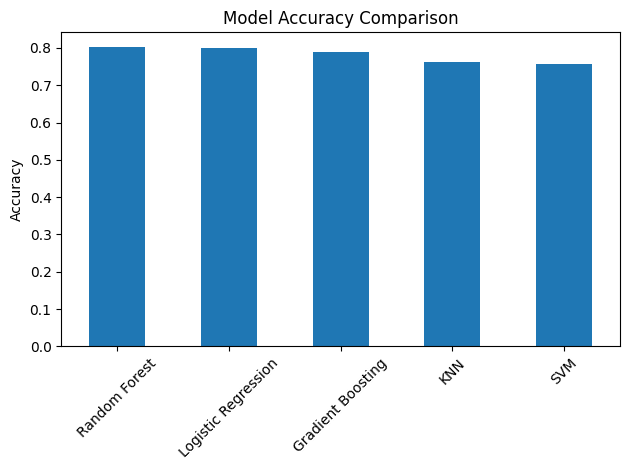

In [80]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Training and Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = model.score(X_test, y_test)
    report = classification_report(y_test, preds, output_dict=True)
    results[name] = {
        'Accuracy': acc,
        'Classification Report': report
    }

# Results Summary
summary = {name: r['Accuracy'] for name, r in results.items()}
df_summary = pd.DataFrame.from_dict(summary, orient='index', columns=['Accuracy'])
df_summary.sort_values('Accuracy', ascending=False).plot(kind='bar', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [81]:
# Display accuracy table
df_summary.sort_values('Accuracy', ascending=False)


,Accuracy
Random Forest,0.801858
Logistic Regression,0.800310
Gradient Boosting,0.789474
KNN,0.763158
SVM,0.756966


In [82]:
# Example of using the best model to make a prediction on new data
best_model = models['Random Forest']  # Assume RandomForest gave the best accuracy

In [83]:
# New movie example (use actual values for prediction)
new_movie = pd.DataFrame({
    'budget': [100000000],  # Example budget
    'popularity': [50.0],  # Example popularity
    'vote_average': [7.5],  # Example average vote
    'vote_count': [2000],  # Example vote count
    'runtime': [120],  # Example runtime
    'release_month': [6],  # Example release month (June)
    'has_famous_actor': [1],  # Example: Has a famous actor
    'tagline_sentiment': [0.2],  # Example sentiment of tagline
    'Action': [1],  # Genre 'Action'
    'Adventure': [0],  # Genre 'Adventure'
    'Comedy': [0],  # Genre 'Comedy'
    'Drama': [1],  # Genre 'Drama'
    'Horror': [0],  # Genre 'Horror'
    'Romance': [0],  # Genre 'Romance'
    'Sci-Fi': [0]  # Genre 'Sci-Fi'
})

# Make prediction
prediction = best_model.predict(new_movie)
print('Prediction:', 'Success' if prediction[0] == 1 else 'Failure')


Prediction: Success


In [84]:
# New movie example expected to fail
new_movie_f = pd.DataFrame({
    'budget': [150000000],       # Very high budget
    'popularity': [3.0],         # Very low popularity
    'vote_average': [3.5],       # Poor ratings
    'vote_count': [50],          # Very few votes
    'runtime': [80],             # Short runtime
    'release_month': [1],        # January (typically low season)
    'has_famous_actor': [0],     # No famous actor
    'tagline_sentiment': [-0.4], # Negative sentiment
    'Action': [0],
    'Adventure': [0],
    'Comedy': [0],
    'Drama': [0],
    'Horror': [1],
    'Romance': [1],
    'Sci-Fi': [0]
})
# Make prediction
prediction = best_model.predict(new_movie_f)
print('Prediction:', 'Success' if prediction[0] == 1 else 'Failure')


Prediction: Failure
